In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
data = Data = pd.read_csv('results.csv', delimiter = ',', encoding='latin-1', header=0)
data.head()

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat
0,172.217.12.170,443,192.168.8.219,55530,6,51,4335,85,85,85.000000,0.000000,1.593452e+09,1.593453e+09,1440.048191,9.012222e-05,30.306676,28.800964,5.879810
1,192.168.8.219,55530,172.217.12.170,443,6,51,2676,52,64,52.470588,2.329293,1.593452e+09,1.593453e+09,1440.048191,7.390976e-05,30.306626,28.800964,5.879813
2,77.234.46.106,80,192.168.8.219,55557,6,66,20066,52,1500,304.030303,474.175807,1.593452e+09,1.593453e+09,1433.032501,1.127720e-04,45.622300,22.046654,21.045142
3,192.168.8.219,55557,77.234.46.106,80,6,62,6468,40,306,104.322581,109.045237,1.593452e+09,1.593453e+09,1433.012500,3.488064e-04,45.611806,23.492008,20.931158
4,192.168.8.219,57580,104.16.122.127,443,6,8,344,40,64,43.000000,7.937254,1.593452e+09,1.593452e+09,91.506789,9.536743e-07,45.224904,13.072398,20.310847


In [4]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [5]:
df = pd.read_csv('results.csv')
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat
0,172.217.12.170,443,192.168.8.219,55530,6,51,4335,85,85,85.000000,0.000000,1.593452e+09,1.593453e+09,1440.048191,9.012222e-05,30.306676,28.800964,5.879810
1,192.168.8.219,55530,172.217.12.170,443,6,51,2676,52,64,52.470588,2.329293,1.593452e+09,1.593453e+09,1440.048191,7.390976e-05,30.306626,28.800964,5.879813
2,77.234.46.106,80,192.168.8.219,55557,6,66,20066,52,1500,304.030303,474.175807,1.593452e+09,1.593453e+09,1433.032501,1.127720e-04,45.622300,22.046654,21.045142
3,192.168.8.219,55557,77.234.46.106,80,6,62,6468,40,306,104.322581,109.045237,1.593452e+09,1.593453e+09,1433.012500,3.488064e-04,45.611806,23.492008,20.931158
4,192.168.8.219,57580,104.16.122.127,443,6,8,344,40,64,43.000000,7.937254,1.593452e+09,1.593452e+09,91.506789,9.536743e-07,45.224904,13.072398,20.310847


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   src_ip           577 non-null    object 
 1   src_port         577 non-null    int64  
 2   dst_ip           577 non-null    object 
 3   dst_port         577 non-null    int64  
 4   proto            577 non-null    int64  
 5   pktTotalCount    577 non-null    int64  
 6   octetTotalCount  577 non-null    int64  
 7   min_ps           577 non-null    int64  
 8   max_ps           577 non-null    int64  
 9   avg_ps           577 non-null    float64
 10  std_dev_ps       577 non-null    float64
 11  flowStart        577 non-null    float64
 12  flowEnd          577 non-null    float64
 13  flowDuration     577 non-null    float64
 14  min_piat         577 non-null    float64
 15  max_piat         577 non-null    float64
 16  avg_piat         577 non-null    float64
 17  std_dev_piat    

In [7]:
x = df.iloc[:,[3,4]].values

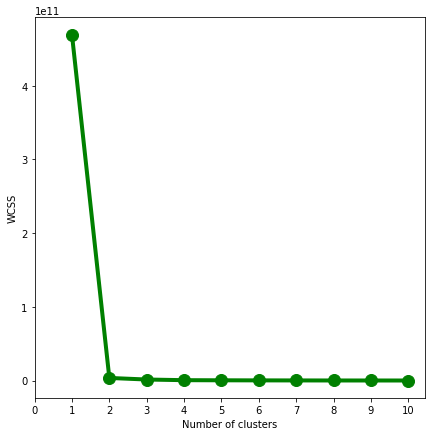

In [8]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [9]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

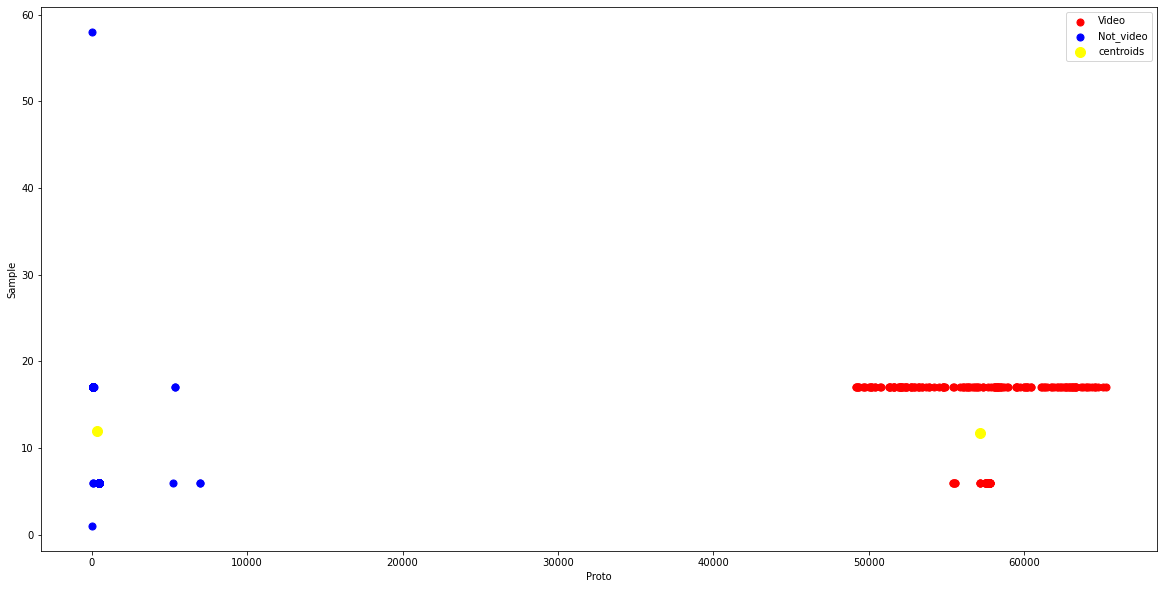

In [10]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'red', label = "Video")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "Not_video")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Proto")
plt.ylabel("Sample")
plt.legend()
plt.show()

In [11]:
x = df[['src_port','proto','flowDuration']].values

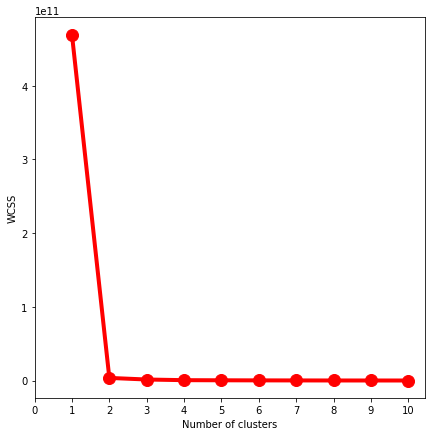

In [12]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

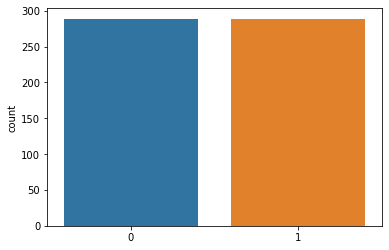

In [14]:
sns.countplot(y_clusters)

In [15]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

55557.0
6.0
1433.0125000476835


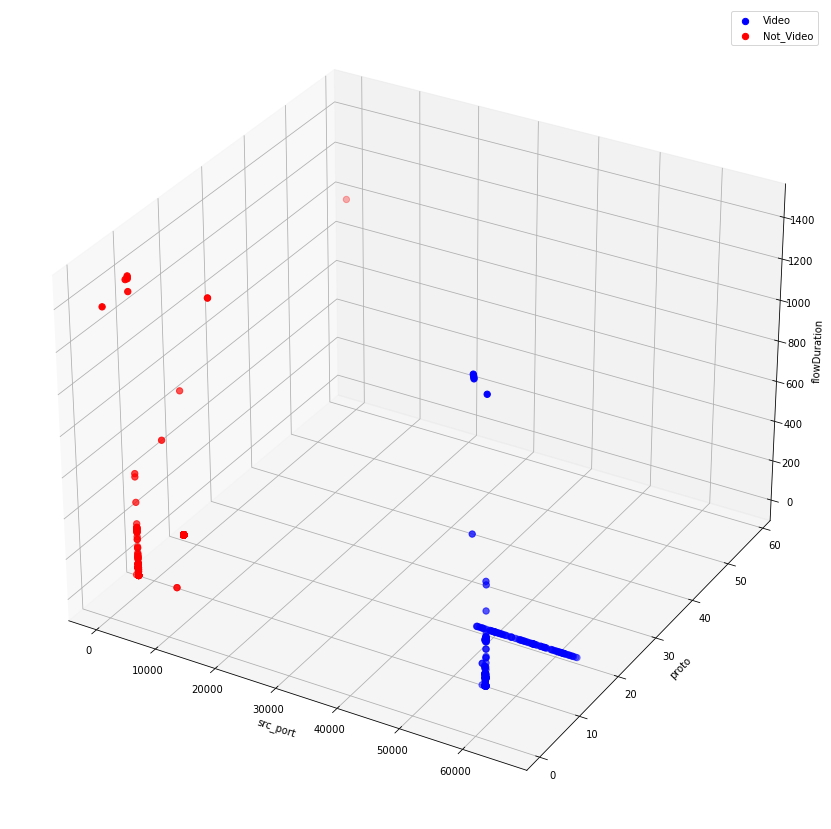

In [16]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "Video")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'red', label = "Not_Video")
ax.set_xlabel('src_port')
ax.set_ylabel('proto')
ax.set_zlabel('flowDuration')
ax.legend()
plt.show()

In [17]:
labels = model.labels_

In [18]:
print(labels)

[1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1
 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1
 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1
 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1
 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0
 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0
 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 

In [19]:
df = pd.read_csv("results.csv")

In [20]:
df["new_column"] = labels

In [21]:
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat,new_column
0,172.217.12.170,443,192.168.8.219,55530,6,51,4335,85,85,85.000000,0.000000,1.593452e+09,1.593453e+09,1440.048191,9.012222e-05,30.306676,28.800964,5.879810,1
1,192.168.8.219,55530,172.217.12.170,443,6,51,2676,52,64,52.470588,2.329293,1.593452e+09,1.593453e+09,1440.048191,7.390976e-05,30.306626,28.800964,5.879813,0
2,77.234.46.106,80,192.168.8.219,55557,6,66,20066,52,1500,304.030303,474.175807,1.593452e+09,1.593453e+09,1433.032501,1.127720e-04,45.622300,22.046654,21.045142,1
3,192.168.8.219,55557,77.234.46.106,80,6,62,6468,40,306,104.322581,109.045237,1.593452e+09,1.593453e+09,1433.012500,3.488064e-04,45.611806,23.492008,20.931158,0
4,192.168.8.219,57580,104.16.122.127,443,6,8,344,40,64,43.000000,7.937254,1.593452e+09,1.593452e+09,91.506789,9.536743e-07,45.224904,13.072398,20.310847,0


In [22]:

predicted_labels = model.labels_
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, predicted_labels)

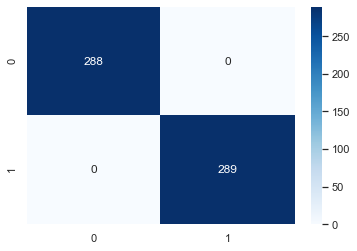

In [23]:
import seaborn as sns; sns.set()

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [24]:
import scipy
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

In [25]:
def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

indexes = scipy.optimize.linear_sum_assignment(_make_cost_m(cm))
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]

In [26]:
from sklearn.metrics.classification import accuracy_score

accuracy_score(labels, predicted_labels)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



1.0

In [27]:
import pandas as pd

In [28]:
df['new_column'].unique()

array([1, 0], dtype=int32)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_data = df.drop('new_column',axis=1)

In [31]:
labels = df['new_column']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [33]:
df.columns

Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'pktTotalCount',
       'octetTotalCount', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps',
       'flowStart', 'flowEnd', 'flowDuration', 'min_piat', 'max_piat',
       'avg_piat', 'std_dev_piat', 'new_column'],
      dtype='object')

In [34]:
import tensorflow as tf
tf.to_float = lambda x: tf.cast(x, tf.float32)

In [35]:
df.head()

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat,new_column
0,172.217.12.170,443,192.168.8.219,55530,6,51,4335,85,85,85.000000,0.000000,1.593452e+09,1.593453e+09,1440.048191,9.012222e-05,30.306676,28.800964,5.879810,1
1,192.168.8.219,55530,172.217.12.170,443,6,51,2676,52,64,52.470588,2.329293,1.593452e+09,1.593453e+09,1440.048191,7.390976e-05,30.306626,28.800964,5.879813,0
2,77.234.46.106,80,192.168.8.219,55557,6,66,20066,52,1500,304.030303,474.175807,1.593452e+09,1.593453e+09,1433.032501,1.127720e-04,45.622300,22.046654,21.045142,1
3,192.168.8.219,55557,77.234.46.106,80,6,62,6468,40,306,104.322581,109.045237,1.593452e+09,1.593453e+09,1433.012500,3.488064e-04,45.611806,23.492008,20.931158,0
4,192.168.8.219,57580,104.16.122.127,443,6,8,344,40,64,43.000000,7.937254,1.593452e+09,1.593452e+09,91.506789,9.536743e-07,45.224904,13.072398,20.310847,0


In [36]:
src_ip = tf.feature_column.categorical_column_with_hash_bucket("src_ip",hash_bucket_size=1000)
src_port = tf.feature_column.categorical_column_with_hash_bucket("src_port",hash_bucket_size=1000)
dst_ip = tf.feature_column.categorical_column_with_hash_bucket("dst_ip",hash_bucket_size=1000)
dst_port = tf.feature_column.categorical_column_with_hash_bucket("dst_port",hash_bucket_size=1000)
proto = tf.feature_column.categorical_column_with_hash_bucket("proto",hash_bucket_size=1000)
pktTotalCount = tf.feature_column.categorical_column_with_hash_bucket("pktTotalCount",hash_bucket_size=1000)
octetTotalCount = tf.feature_column.categorical_column_with_hash_bucket("octetTotalCount",hash_bucket_size=1000)
min_ps = tf.feature_column.categorical_column_with_hash_bucket("min_ps",hash_bucket_size=1000)
max_ps = tf.feature_column.categorical_column_with_hash_bucket("max_ps",hash_bucket_size=1000)
avg_ps = tf.feature_column.categorical_column_with_hash_bucket("avg_ps",hash_bucket_size=1000)
std_dev_ps = tf.feature_column.categorical_column_with_hash_bucket("std_dev_ps",hash_bucket_size=1000)
flowStart = tf.feature_column.categorical_column_with_hash_bucket("flowStart",hash_bucket_size=1000)
flowEnd = tf.feature_column.categorical_column_with_hash_bucket("flowEnd",hash_bucket_size=1000)
flowDuration = tf.feature_column.categorical_column_with_hash_bucket("flowDuration",hash_bucket_size=1000)
min_piat = tf.feature_column.categorical_column_with_hash_bucket("min_piat",hash_bucket_size=1000)
max_piat = tf.feature_column.categorical_column_with_hash_bucket("max_piat",hash_bucket_size=1000)
avg_piat = tf.feature_column.categorical_column_with_hash_bucket("avg_piat",hash_bucket_size=1000)
std_dev_piat = tf.feature_column.categorical_column_with_hash_bucket("std_dev_piat",hash_bucket_size=1000)

In [37]:
feat_cols = [src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,max_piat,avg_piat,std_dev_piat]

In [38]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100,num_epochs=None,shuffle=True)

In [39]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/qf/x4zt60d17593p_nh2sl0p2v40000gn/T/tmpynzw07zd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
model.train(input_fn=input_func,steps=120)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning:

`layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.



ValueError: in user code:

    /opt/anaconda3/lib/python3.8/site-packages/tensorflow_estimator/python/estimator/canned/linear.py:1671 call  *
        return self.layer(features)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow_estimator/python/estimator/canned/linear.py:1499 call  *
        weighted_sum = fc_v2._create_weighted_sum(  # pylint: disable=protected-access
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:2133 _create_weighted_sum  **
        return _create_categorical_column_weighted_sum(
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:2225 _create_categorical_column_weighted_sum
        sparse_tensors = column.get_sparse_tensors(transformation_cache,
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:3344 get_sparse_tensors
        transformation_cache.get(self, state_manager), None)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:2355 get
        transformed = column.transform_feature(self, state_manager)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:3322 transform_feature
        return self._transform_input_tensor(input_tensor)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:3298 _transform_input_tensor
        fc_utils.assert_string_or_int(
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/utils.py:57 assert_string_or_int
        raise ValueError(

    ValueError: column_name: avg_piat input_tensor dtype must be string or integer. dtype: <dtype: 'float32'>.


In [58]:
pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [59]:
pred_gen = model.predict(input_fn=pred_fn)

In [60]:
predictions = list(pred_gen)

INFO:tensorflow:Could not find trained model in model_dir: /var/folders/qf/x4zt60d17593p_nh2sl0p2v40000gn/T/tmps5s7h2vo, running initialization to predict.
INFO:tensorflow:Calling model_fn.


ValueError: in user code:

    /opt/anaconda3/lib/python3.8/site-packages/tensorflow_estimator/python/estimator/canned/linear.py:1671 call  *
        return self.layer(features)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow_estimator/python/estimator/canned/linear.py:1499 call  *
        weighted_sum = fc_v2._create_weighted_sum(  # pylint: disable=protected-access
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:2133 _create_weighted_sum  **
        return _create_categorical_column_weighted_sum(
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:2225 _create_categorical_column_weighted_sum
        sparse_tensors = column.get_sparse_tensors(transformation_cache,
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:3344 get_sparse_tensors
        transformation_cache.get(self, state_manager), None)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:2355 get
        transformed = column.transform_feature(self, state_manager)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:3322 transform_feature
        return self._transform_input_tensor(input_tensor)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/feature_column_v2.py:3298 _transform_input_tensor
        fc_utils.assert_string_or_int(
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/feature_column/utils.py:57 assert_string_or_int
        raise ValueError(

    ValueError: column_name: avg_piat input_tensor dtype must be string or integer. dtype: <dtype: 'float32'>.


In [61]:
predictions = list(predictions)

NameError: name 'predictions' is not defined